#Implementing K-Nearest Neighbors Algorithm using deepC

In [0]:
!pip install deepC

## Import deepC

In [0]:
#import necessary dependencies
import deepC.dnnc as dc
from sklearn.datasets import load_iris
import random

## KNN Algorithm
---

**Constructor:**
   1. load iris dataset
   1. Initialize variables

**Fit**
  1. Survey opinions in the neighorhood
  1. compute difference of opinions using euclidean distance, i.e. 
  
  $\sum_i\sqrt{(feature_i-query)^2}$
 
  1. sort surver based on increasing order of euclidean distance.
  1. count top-K votes.

**Predict**
  1. return majority vote, i.e number of labels in top-k votes.

**Announce**
  1. return winner label of majority vote

In [0]:
class iris_knn:
  def __init__(self, query=None, truth=None):
    # load dataset
    iris=load_iris()
    self.features = iris['data'].tolist()
    self.labels   = iris['target'].tolist()
    self.label_names = {0:'setosa', 1:'versicolor', 2:'virginica'}

    # initialize variables
    self.votes = [0,0,0]
    if ( query is None ):
      index = random.randint(0, len(self.labels)-1)
      self.query = dc.array(self.features[index])
      self.truth = self.labels[index]
    else:
      self.query = query
      self.truth = truth

  def fit(self, k=20):
    # step 1: neighborhood survey
    survey = []
    for i in range(len(self.features)):  
      feature = dc.array(self.features[i])
      opinion_difference = dc.sqrt(dc.power(dc.sub(feature, self.query),2)).sum()
      survey.append([opinion_difference, self.labels[i]])

    # step 2: survey aggregation
    neighbors_poll = [lbl for (diff, lbl) in sorted(zip(survey, self.labels))][:k]

    # step 3: count votes
    for lbl in neighbors_poll:
      self.votes[lbl] += 1

  def predict(self):
    majority_vote = dc.argmax(dc.array(self.votes))[0]
    return majority_vote;

  def announce(self):
    print("Neighbor's majority vote : ", self.label_names[self.predict()])
    print("Candidate's ground truth : ", self.label_names[self.truth])

# Use model

In [0]:
knn = iris_knn()
knn.fit()
knn.announce()

Neighbor's majority vote :  versicolor
Candidate's ground truth :  versicolor


#Visualizing the Data

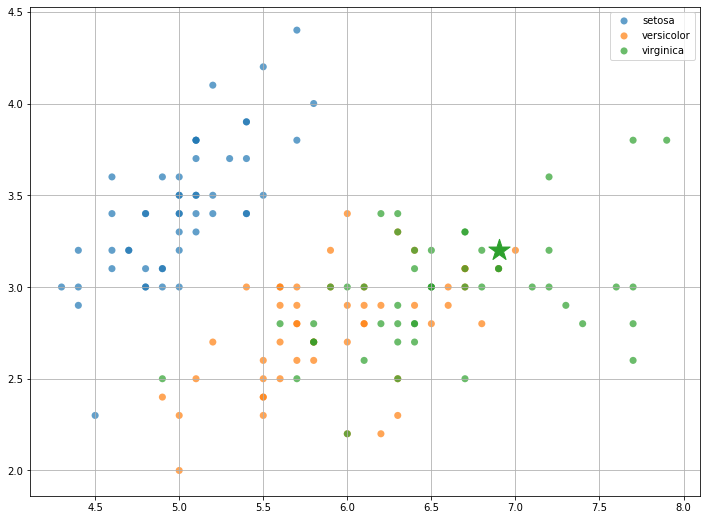

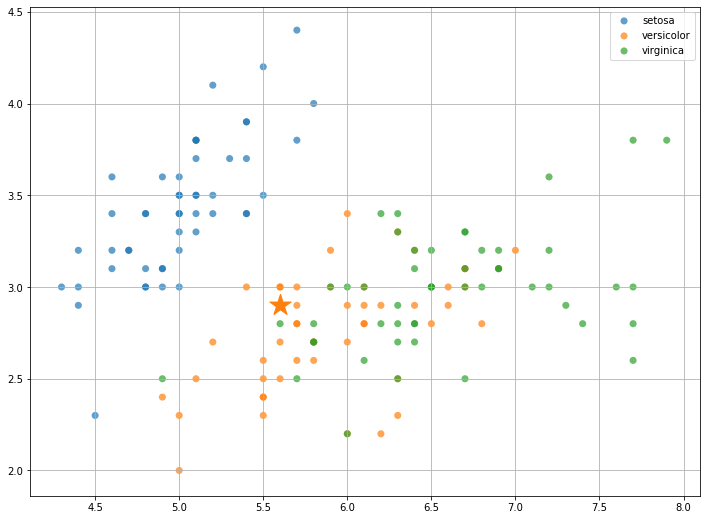

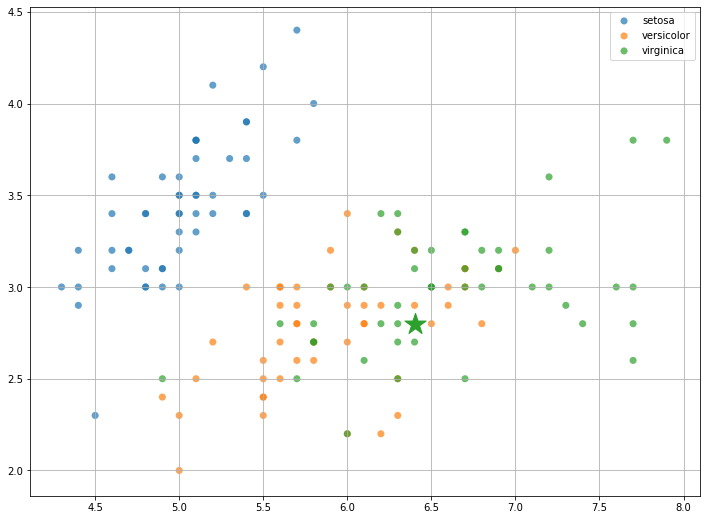

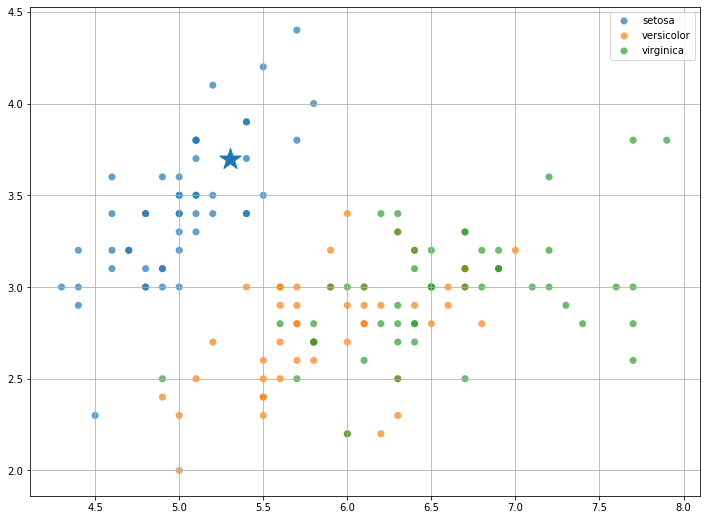

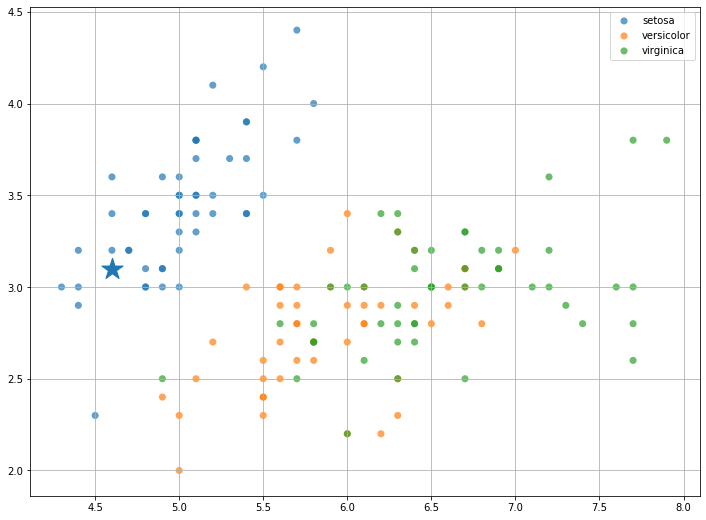

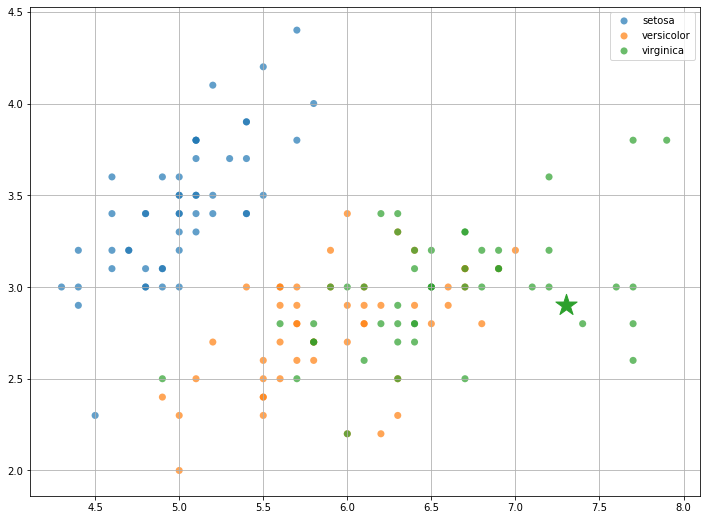

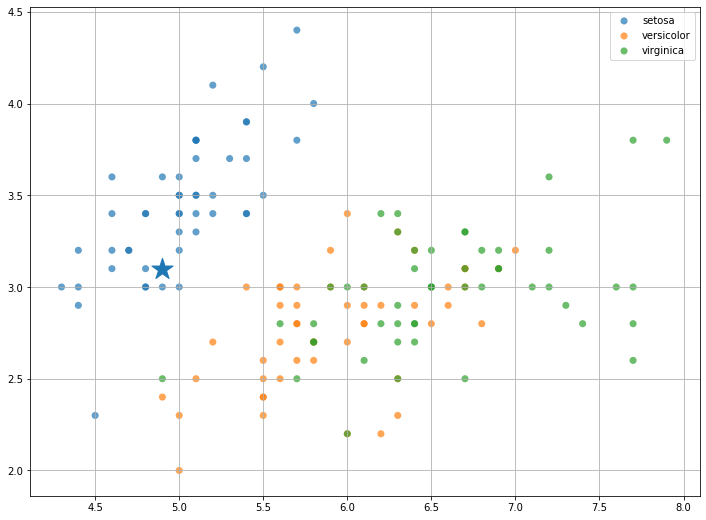

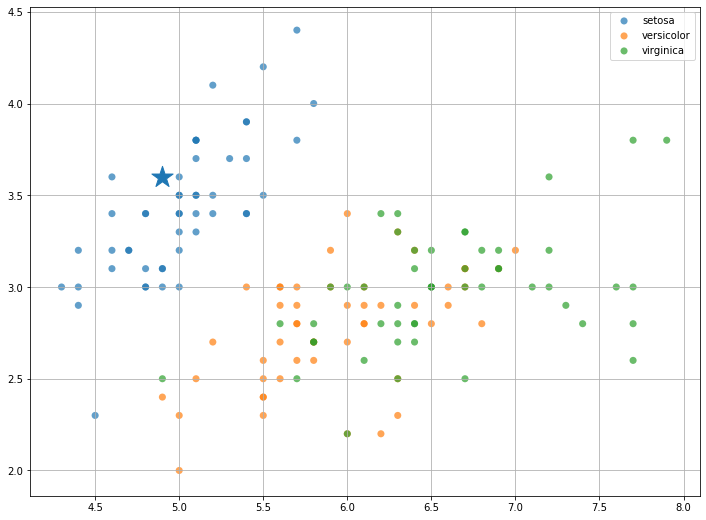

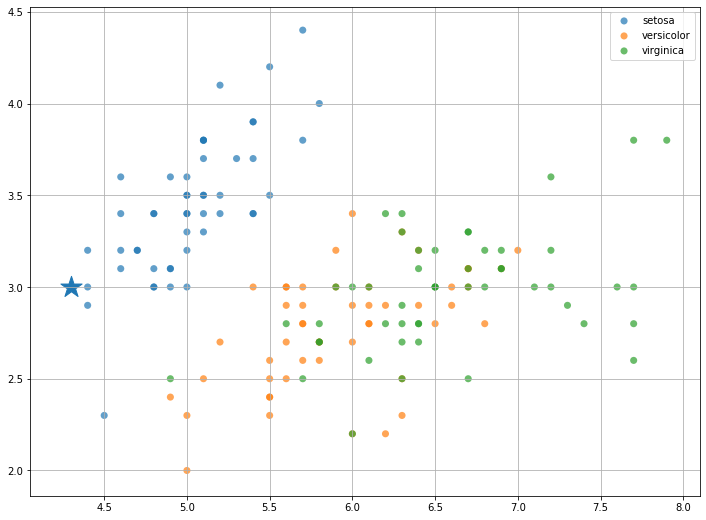

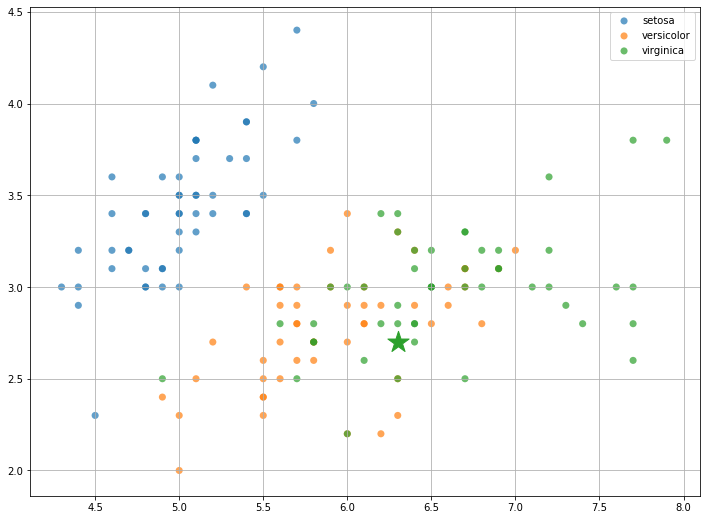

In [0]:
import matplotlib.pyplot as plt
import time

for repeat in range(10):
  knn = iris_knn()
  knn.fit()

  colors = ['tab:blue', 'tab:orange', 'tab:green']
  classes = [ [], [], [] ]
  for (feature, lbl) in zip (knn.features, knn.labels):
    classes[lbl].append(feature[0:2])


  fig, ax = plt.subplots()
  fig.set_size_inches(12,9)
  for i in range(3):
      color = colors[i]
      x = [xy[0] for xy in classes[i]]
      y = [xy[1] for xy in classes[i]]
      ax.scatter(x, y, c=color, s=50, label=knn.label_names[i],
                alpha=0.7, edgecolors='none')
  ax.scatter(knn.query[0], knn.query[1], s=500, marker='*',
             c=colors[knn.predict()])
  ax.legend()
  ax.grid(True)

  plt.show()
  time.sleep(2)